In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



In [6]:
data = pd.read_csv(r"E:\car.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [7]:
data.isnull().sum()#no empty data


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.info()#the data type for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [9]:
print(data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven   Fuel_Type  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    1.212625   
std       2.891554       5.082812       8.644115   38886.883882    0.425801   
min    2003.000000       0.100000       0.320000     500.000000    1.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    1.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    1.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    1.000000   
max    2018.000000      35.000000      92.600000  500000.000000    3.000000   

       Seller_Type  Transmission       Owner  
count   301.000000    301.000000  301.000000  
mean      0.647841      0.867110    0.043189  
std       0.478439      0.340021    0.247915  
min       0.000000      0.000000    0.000000  
25%       0.000000      1.000000    0.000000  
50%   

In [10]:
data.Car_Name.unique()


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


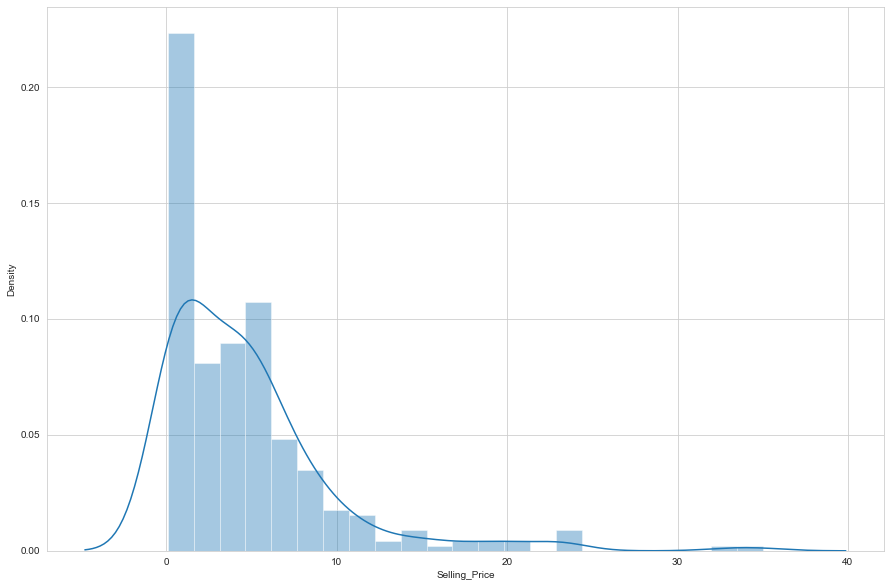

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.show()

In [12]:
print(data.corr())

                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187   0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647   0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440415    0.166801   1.000000   
Seller_Type    0.039896       0.550724       0.512030    0.101419   0.352415   
Transmission   0.000394      -0.367128      -0.348715   -0.162510  -0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216  -0.055705   

               Seller_Type  Transmission     Owner  
Year              0.039896      0.000394 -0.182104  
Selling_Price     0.550724     -0.367128 -0.088344  
Present_Price     0.512030     -0.348715  0.008057  
Kms_Driven        0.101419     -0.162510  0.089216  
Fuel_Type     

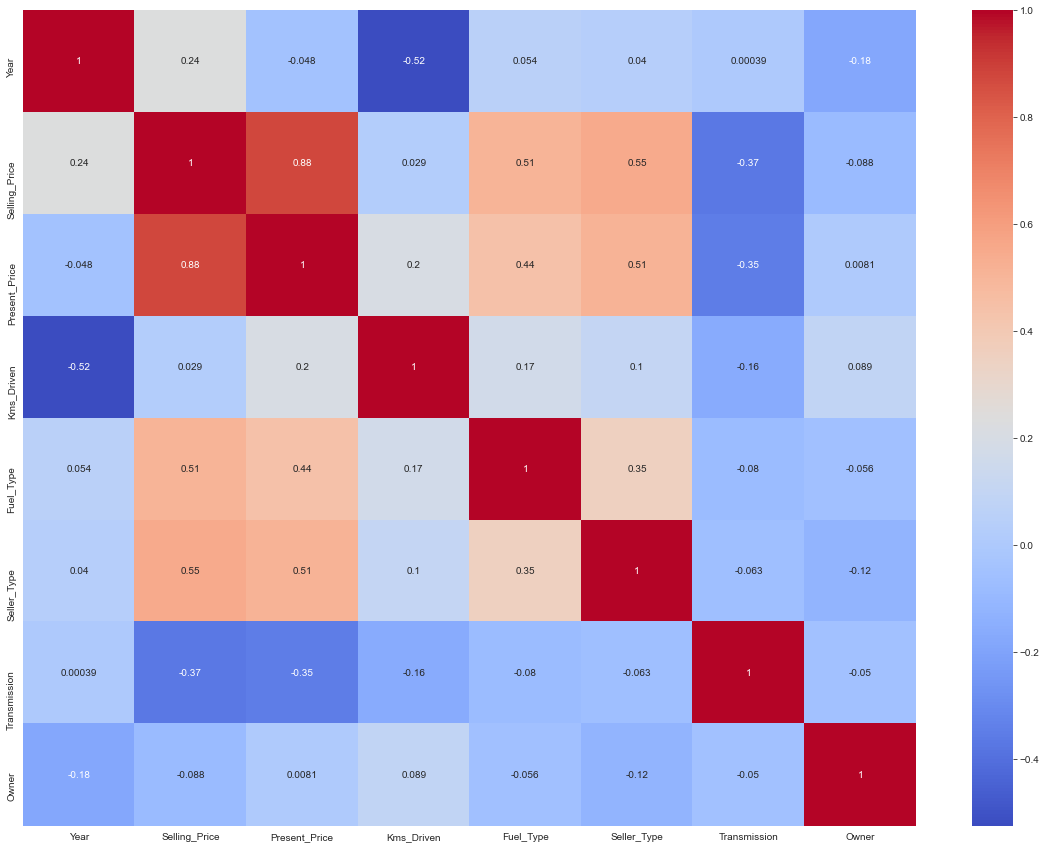

In [13]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


In [14]:
predict = "Selling_Price"
data = data[["Owner", "Transmission", "Seller_Type", 
             "Fuel_Type", "Kms_Driven", "Present_Price", 
             "Selling_Price", "Year"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])




In [25]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
model.score(x_test, predictions)



1.0

In [29]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(xtrain,ytrain)
test_data_prediction = regressor.predict(xtest)


In [30]:
test_data_prediction = regressor.predict(xtest)

In [31]:
error_score1 = metrics.r2_score(ytest, test_data_prediction)
print("R squared error : ", error_score1)

R squared error :  0.9625273244089918


In [45]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [10, 20, 30],
   
    'max_depth': [10,20,30,50,70,10],
    
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("mean squared error:"+ str(-grid.best_score_))

{'max_depth': 10, 'n_estimators': 20}
mean squared error:9.205281107972493


In [24]:
# model  96% of variation within the data
print(test_data_prediction)

[ 0.6753  2.656   3.939   6.6659  9.141   1.2665  4.9045  2.6537  4.6509
 16.5805  2.5137 10.403   7.656   0.2175  8.4614  5.604   5.7195  0.2039
  1.4     0.1832  1.1381  0.7185  2.8875  4.409   1.0375  2.2775 20.92
  2.099   7.8049  6.7948 16.435   2.632   4.8295  1.4735  1.4545  3.089
  3.8096 23.335   3.092   5.4265  0.6793  0.9003  1.4516  1.1199  6.802
  3.058   0.916   9.4718  6.6817  5.236   3.422   7.8844  4.4795  4.8559
  5.238   0.3283  8.0765  6.559  10.1264  1.1571  0.5399]


In [83]:
ytest = list(ytest)

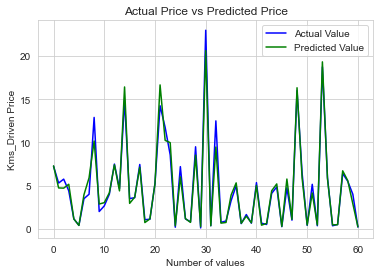

In [84]:
plt.plot(ytest, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Kms_Driven Price')
plt.legend()
plt.show()

In [85]:
data['Selling_Price'].unique

<bound method Series.unique of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)



LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error
model.score(x_test, predictions)

1.0

In [34]:
training_data_prediction = lin_reg.predict(x_train)

In [36]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8729197552786296


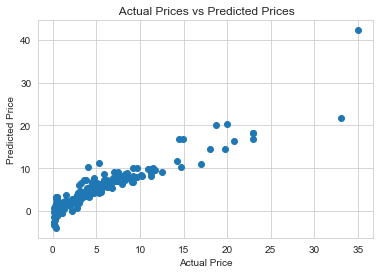

In [37]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [39]:
test_data_prediction = lin_reg.predict(x_test)

In [41]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8798755305657366


In [47]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['mse','mae']
}
n_iter_search=20 
clf = RandomForestRegressor(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(x, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

{'criterion': 'mae', 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 16}
MSE:11.217000892620021


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

In [44]:
print(test_data_prediction)

[ 6.88623985  8.28529465 -0.52165333  2.42904031  2.16533247  5.43298949
  0.09286505  0.98820175  4.86014047  9.59399815 -1.99179975  3.7967325
  7.26265863  0.24073666  4.4177863   5.16509435  9.15918293 20.65391433
  4.34050391  4.23012046  1.66893236  2.90964282  2.36587276  8.85387068
  7.49638243  5.60086786 -2.22770335  2.26558041  5.18297108  1.39852935
 -1.14150146  7.72884     0.87896181  1.76206003  0.55555147  1.62501138
  2.36602873  2.08008951  1.16101684  7.77255121  8.65669987  6.20463068
  7.76865938  4.40195195  0.45460237 -0.3109999   1.86965735  5.18350685
  0.12123342 10.29764033 -1.26606046  7.83181501  9.54671794  5.17939986
  5.83865822 -0.24638125  5.4276846   4.4375412  15.89459108  0.35785046
  1.28212485]


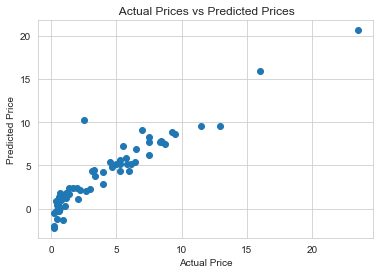

In [43]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()